In [27]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# 1. Load the Dataset

In [29]:
#Load dataset
(x_train,y_train), (x_test,y_test) = keras.datasets.mnist.load_data()

# 2. Analyze and explore the dataset

In [31]:
#Analyze the data 
x_train.shape

(60000, 28, 28)

In [32]:
y_train.shape

(60000,)

In [37]:
x_test.shape

(10000, 28, 28)

In [41]:
x_train[10]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  42, 118,
        219, 166, 118, 118,   6,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 103, 242, 254,
        254, 254, 254, 254,  66,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

# 2.1 plot sample data to get a better visual representation

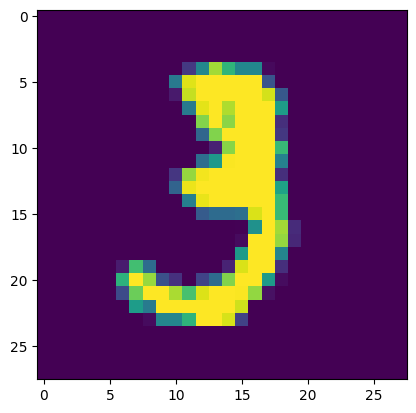

In [44]:
#plot sample data to get a better visual representation
plt.imshow(x_train[10])
plt.show()

#  2.2 Check the respective image label

In [47]:
# Check the respective image label
y_train[10]

3

In [49]:
x_train.shape

(60000, 28, 28)

In [51]:
len(x_train)

60000

#  3. Normalize the pixel data

In [54]:
#Normalized pixel data
x_train = x_train/255
x_test = x_test/255

In [56]:
x_train[10]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

#  4. Flattening the images

In [59]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_train_flattened.shape

(60000, 784)

In [61]:
x_test_flattened = x_test.reshape(len(x_test),28*28)
x_test_flattened.shape

(10000, 784)

# 5.1 Building the first Model with a single Dense Layer

In [318]:

model = keras.Sequential(
    [
        keras.layers.Dense(10, input_shape= (784,) ,activation='sigmoid')
    ]
)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', #we have categories of outputs 1-9
             metrics=['accuracy']
             )
model.fit(x_train_flattened,y_train,epochs=5)


C:\Anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8120 - loss: 0.7225
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 950us/step - accuracy: 0.9141 - loss: 0.3109
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 960us/step - accuracy: 0.9205 - loss: 0.2823
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 965us/step - accuracy: 0.9258 - loss: 0.2688
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 957us/step - accuracy: 0.9254 - loss: 0.2676


# 5.2 Evaluating the model

In [320]:
#Evaluating the model
model.evaluate(x_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9126 - loss: 0.3079


[0.27340811491012573, 0.9232000112533569]

# 5.3 Testing the model with a sample prediction

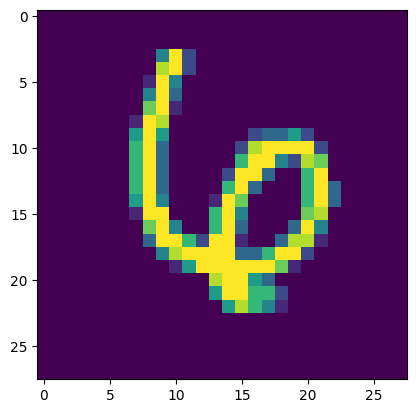

In [322]:
plt.imshow(x_test[22])

In [324]:
k = model.predict(x_test[22].reshape(1,784)) 
np.argmax(k)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


6

In [326]:
y_peddicted_Labels = [np.argmax(i) for i in model.predict(x_test_flattened)]


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step


# 5.4 Building a confusion metrix to evaluate he performance 

In [67]:
# Building a confusion metrix to evaluate he performance 
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_peddicted_Labels)
cm

NameError: name 'y_peddicted_Labels' is not defined

In [330]:
import seaborn as sns

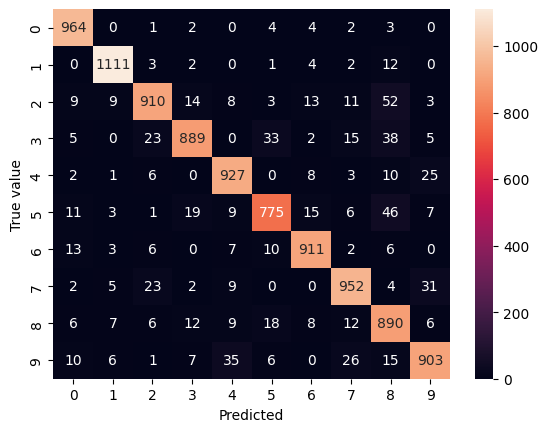

In [332]:
#Plotting the confusion matix using seaborn library for a better visual representation
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("True value")
plt.show()

# 6.1 Building the second Model with a hidden layer (with 100 neurones) 

In [334]:
#building another model with hidden layer
model2 = keras.Sequential(
    [
        #without keras flatten layer, because we are manually flattening the image to (x_train_flattened)
        #100 is hidden layer neurones and activation function is relu 
        keras.layers.Dense(100, input_shape= (784,) ,activation='relu'),
        keras.layers.Dense(10 ,activation='sigmoid')
    ]
)

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', #we have categories of outputs 1-9
             metrics=['accuracy']
             )
model2.fit(x_train_flattened,y_train,epochs=5)

C:\Anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8695 - loss: 0.4640
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9617 - loss: 0.1333
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9736 - loss: 0.0902
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9810 - loss: 0.0654
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9844 - loss: 0.0508


# 6.2 Evaluating the model

In [335]:
# evaluate model for training data
model2.evaluate(x_train_flattened, y_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 984us/step - accuracy: 0.9894 - loss: 0.0377


[0.038231298327445984, 0.9889333248138428]

In [338]:
# evaluate model for testing data
model2.evaluate(x_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9745 - loss: 0.0908  


[0.08006629347801208, 0.9775999784469604]

In [340]:
# Building a confusion metrice to evaluate he performance 
y_peddicted_Labels = [np.argmax(i) for i in model2.predict(x_test_flattened)]
cm1 = tf.math.confusion_matrix(labels=y_test,predictions=y_peddicted_Labels)
cm1

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    1,    2,    0,    5,    1,    5,    1,    2,    2],
       [   0, 1123,    6,    0,    0,    0,    2,    0,    4,    0],
       [   1,    2, 1009,    2,    3,    0,    3,    4,    7,    1],
       [   2,    0,    3,  989,    0,    0,    1,    8,    4,    3],
       [   0,    1,    2,    1,  967,    1,    3,    1,    1,    5],
       [   2,    0,    0,    9,    4,  859,    7,    0,    8,    3],
       [   2,    3,    2,    1,    4,    1,  942,    0,    3,    0],
       [   0,    6,   10,    2,    1,    0,    0, 1003,    2,    4],
       [   3,    1,    7,    4,    4,    2,    1,    4,  945,    3],
       [   0,    3,    0,    4,   10,    1,    2,    8,    3,  978]])>

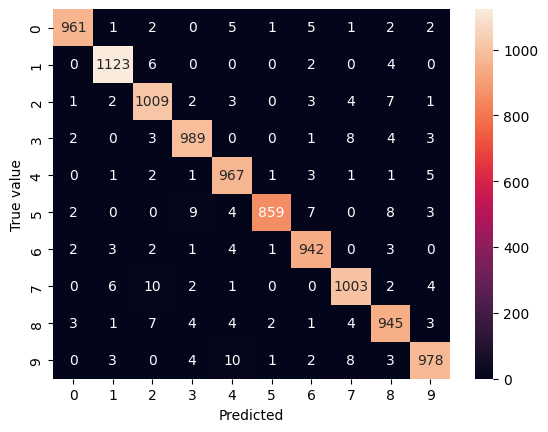

In [342]:
#Plotting the confusion matix using seaborn library for a better visual representation
sns.heatmap(cm1, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("True value")
plt.show()

# 7.1 Building the third Model using Flatten and a hidden layer 

In [344]:
#building another model with hidden layer
model3 = keras.Sequential(
    [
        #Flatten layer
        keras.layers.Flatten(input_shape=(28,28)),
  
        keras.layers.Dense(100 ,activation='relu'),
        keras.layers.Dense(10 ,activation='sigmoid')
    ]
)

model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', #we have categories of outputs 1-9
             metrics=['accuracy']
             )
model3.fit(x_train,y_train,epochs=5)

C:\Anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8676 - loss: 0.4742
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9606 - loss: 0.1377
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9724 - loss: 0.0906
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9809 - loss: 0.0642
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9840 - loss: 0.0535


# 7.2 Evaluating the model

In [346]:
# Evaluate the model for training data
# using x_train derectly without flattening 
model3.evaluate(x_train, y_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 973us/step - accuracy: 0.9868 - loss: 0.0458


[0.04632463678717613, 0.9859333038330078]

In [348]:
y_peddicted_Labels = [np.argmax(i) for i in model3.predict(x_test)]
cm3 = tf.math.confusion_matrix(labels=y_test,predictions=y_peddicted_Labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step


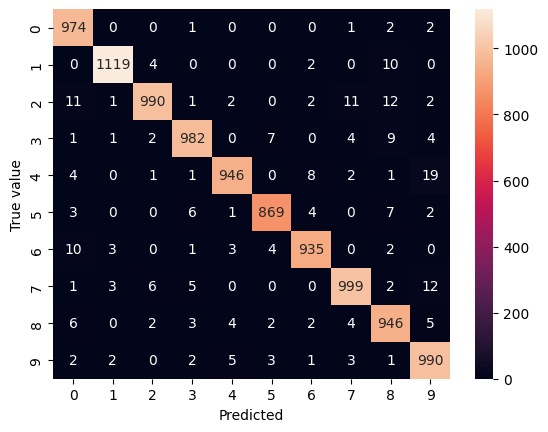

In [350]:
#Plotting the confusion matix using seaborn library for a better visual representation
sns.heatmap(cm3, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("True value")
plt.show()